In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive



# 1. Chuẩn bị dữ liệu

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Big_Data/Code/Data/application_data.csv')




# 2.  Tiền xử lý dữ liệu




In [ ]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(307511, 122)

**2.1 Thực hiện xóa các cột dữ liệu chứa số lượng giá trị null lớn hơn 40% tổng số bản ghi**







In [ ]:
missing_value = pd.DataFrame((data.isnull().sum()) * 100 / data.shape[0])

In [ ]:
data =  data.drop([ 'SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
          'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
          'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
          'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
          'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
          'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
          'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
          'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
          'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
          'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
          'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
          'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
          'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
          'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
          'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
          'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1, errors='ignore')

In [ ]:
missing_value = pd.DataFrame({'value' : data.isnull().sum()*100/len(data.index)})
print("Các thuộc tính có giá trị null < 40%:\n",missing_value[missing_value['value'] < 0.4]['value'])

Các thuộc tính có giá trị null < 40%:
 TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
FLAG_OWN_REALTY       0.0
                     ... 
FLAG_DOCUMENT_17      0.0
FLAG_DOCUMENT_18      0.0
FLAG_DOCUMENT_19      0.0
FLAG_DOCUMENT_20      0.0
FLAG_DOCUMENT_21      0.0
Name: value, Length: 62, dtype: float64


In [ ]:
missing_value = pd.DataFrame({'value' : data.isnull().sum()*100/len(data.index)})
print("Các thuộc tính có giá trị 0 < null < 40%:\n",missing_value[missing_value['value'] > 0]['value'])

Các thuộc tính có giá trị 0 < null < 40%:
 AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Name: value, dtype: float64


**2.2 Xử lý các giá trị thiếu (NaN) và các giá trị âm**

In [ ]:
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY']).mean()

In [ ]:
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE']).mean()

In [ ]:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS']).mean()

In [ ]:
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_30_CNT_SOCIAL_CIRCLE']).mean()

In [ ]:
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_30_CNT_SOCIAL_CIRCLE']).mean()

In [ ]:
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_60_CNT_SOCIAL_CIRCLE']).mean()

In [ ]:
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_60_CNT_SOCIAL_CIRCLE']).mean()

In [ ]:
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE']).mean()

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_HOUR'] = data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(data['AMT_REQ_CREDIT_BUREAU_HOUR']).mean()

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_DAY'] = data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(data['AMT_REQ_CREDIT_BUREAU_DAY']).mean()

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_WEEK'] = data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data['AMT_REQ_CREDIT_BUREAU_WEEK']).mean()

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_MON'] = data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data['AMT_REQ_CREDIT_BUREAU_MON']).mean()

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_QRT'] = data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data['AMT_REQ_CREDIT_BUREAU_QRT']).mean()

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR']).mean()

In [ ]:
data['NAME_TYPE_SUITE'].describe()

,NAME_TYPE_SUITE
count,306219
unique,7
top,Unaccompanied
freq,248526


In [ ]:
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [ ]:
def checkNull(x):
  null_columns = x.columns[x.isnull().any()].tolist()
  if null_columns:
    print('Columns with null value: ', null_columns)
  else:
      print('No columns have null value!')

In [ ]:
def find_negative_columns(df):
    # Tạo danh sách để lưu các cột có giá trị âm
    negative_columns = []

    # Lặp qua từng cột trong DataFrame
    for col in df.columns:
        # Chỉ kiểm tra các cột số (bỏ qua cột chuỗi)
        if pd.api.types.is_numeric_dtype(df[col]):
            # Kiểm tra nếu cột có giá trị âm (bỏ qua các giá trị null)
            if (df[col] < 0).any(skipna=True):  # skipna=True bỏ qua các giá trị NaN
                negative_columns.append(col)

    if negative_columns:
        print("Columns with negative values:", negative_columns)
    else:
        print("No columns have negative values.")

In [ ]:
checkNull(data)

No columns have null value!


In [ ]:
find_negative_columns(data)

Columns with negative values: ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [ ]:
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED'])
data['DAYS_REGISTRATION'] = abs(data['DAYS_REGISTRATION'])
data['DAYS_ID_PUBLISH'] = abs(data['DAYS_ID_PUBLISH'])
data['DAYS_LAST_PHONE_CHANGE'] = abs(data['DAYS_LAST_PHONE_CHANGE'])

**2.3 Chuẩn hóa dữ liệu số**

In [ ]:
y = data['TARGET'].iloc[:10000]
x = data.drop(['TARGET'], axis=1).iloc[:10000]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Trích xuất các thuộc tính số và chuẩn hóa
selected_ser = x.select_dtypes(include=['int64', 'float64'])
print('Danh sách các cột thuộc tính có  dữ liệu số:  \n',  selected_ser.columns)

# Chuẩn hóa dữ liệu
scaler_ser = StandardScaler().fit_transform(selected_ser)
dt_numdata = pd.DataFrame(scaler_ser, columns=selected_ser.columns)

Danh sách các cột thuộc tính có  dữ liệu số:  
 Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'F

**2.4 Xử lý dữ liệu chữ (One-hot Code)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False, drop='first') # thêm sparse = False

# Trích xuất thuộc tính mục từ bộ dữ liệu
selected_ser = x.select_dtypes(include=['object']).copy()
print("Danh sách thuộc tính có dữ liệu mục: \n", selected_ser.columns)

# One-hot mã hóa và chuyển về DataFrame
dt_catdata = pd.DataFrame(encoder.fit_transform(selected_ser), columns=encoder.get_feature_names_out(selected_ser.columns))

# Đảm bảo chỉ số khớp nhau trước khi nối
dt_catdata.index = dt_numdata.index

Danh sách thuộc tính có dữ liệu mục: 
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [ ]:
x = pd.concat([dt_numdata, dt_catdata], axis=1)
x.shape

(10000, 147)

**2.5 Imbalanced data**

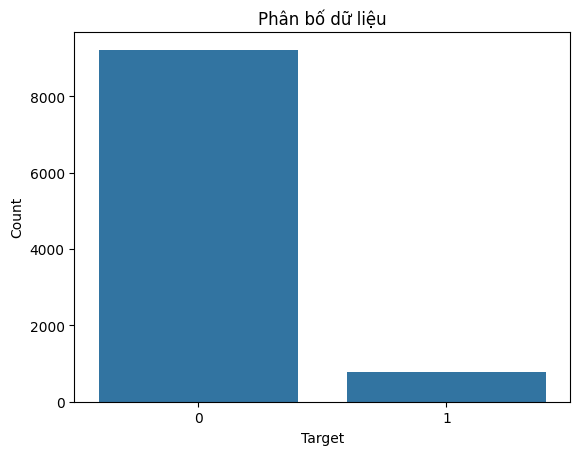

In [ ]:
sns.countplot(x=y, data=data)
plt.title('Phân bố dữ liệu')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 27)
x, y = smote.fit_resample(x, y)

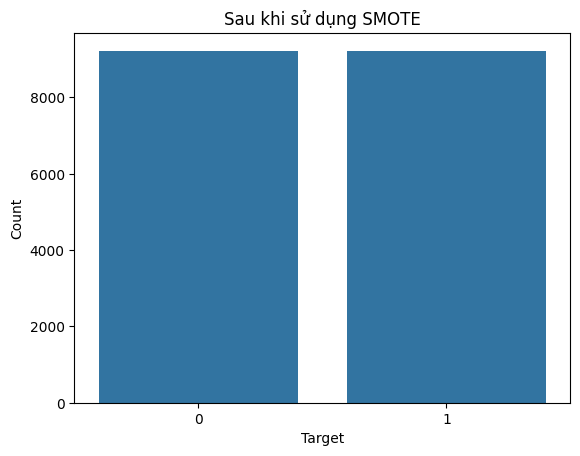

In [ ]:
sns.countplot(x=y, data=data)
plt.title('Sau khi sử dụng SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**2.6 Lựa chọn thuộc tính quan trọng**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Khởi tạo và huấn luyện mô hình (giả sử x và y đã được định nghĩa)
rfc = RandomForestClassifier()
rfc.fit(x, y)

# Trích xuất thuộc tính quan trọng
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': x.columns, 'importance': score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

In [ ]:
top = 25/100 * len(x.columns)
top = int(top)
print(top)

36


                                                   importance
feature                                                      
NAME_EDUCATION_TYPE_Secondary / secondary special       0.053
CODE_GENDER_M                                           0.051
FLAG_OWN_CAR_Y                                          0.046
NAME_EDUCATION_TYPE_Higher education                    0.043
DAYS_BIRTH                                              0.040
ORGANIZATION_TYPE_Business Entity Type 3                0.038
FLAG_OWN_REALTY_Y                                       0.037
NAME_INCOME_TYPE_Working                                0.036
AMT_CREDIT                                              0.035
NAME_FAMILY_STATUS_Married                              0.035
REGION_POPULATION_RELATIVE                              0.032
DAYS_ID_PUBLISH                                         0.031
AMT_INCOME_TOTAL                                        0.030
WEEKDAY_APPR_PROCESS_START_MONDAY                       0.030
DAYS_REG

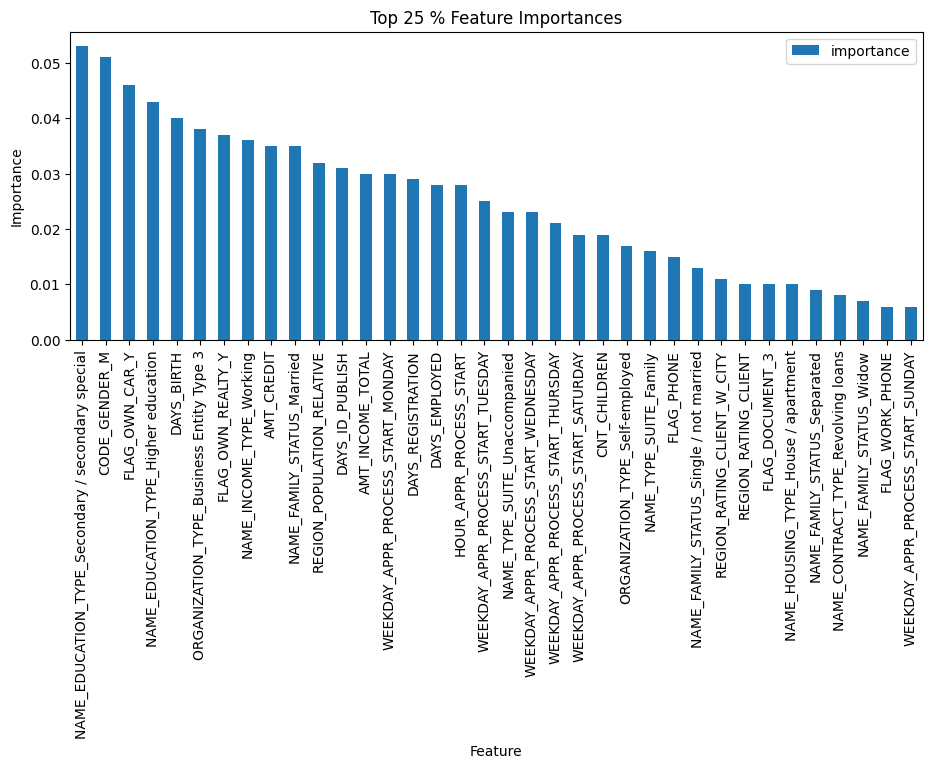

In [ ]:
# Lọc ra 15 đặc trưng quan trọng nhất
top_importances = importances.head(36)
# Hiển thị 15 đặc trưng quan trọng nhất dưới dạng bảng
print(top_importances)

# Vẽ biểu đồ cột cho 15 đặc trưng quan trọng nhất
plt.rcParams['figure.figsize'] = (11, 4)
top_importances.plot.bar()
plt.title('Top 25 % Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Xóa các thuộc tính không quan trọng
features = top_importances.index.to_list()
x = x[features]

# 3. Chia bộ dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.70, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.70, random_state=42)

# 4. Huấn luyện mô hình

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train SVC
Support_Vector_Classifier = SVC(kernel='rbf', probability=True)
Support_Vector_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=40)
LGR_Classifier.fit(X_train, Y_train);

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# 5. Đánh giá mô hình (Dựa trên  tập validation)

In [ ]:
from sklearn import metrics

models = []
models.append(('Support_Vector_Classifier', Support_Vector_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_val, Y_val, cv=10)

    # Dự báo xác suất cho các mẫu trong tập kiểm tra
    probabilities = v.predict_proba(X_test)[:, 1]
    # Áp dụng ngưỡng 0.5 để phân loại
    predictions = (probabilities >= 0.5).astype(int)

    accuracy = metrics.accuracy_score(Y_val, v.predict(X_val))
    confusion_matrix = metrics.confusion_matrix(Y_val, v.predict(X_val))
    classification = metrics.classification_report(Y_val, v.predict(X_val))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    # In kết quả xác suất và phân loại
    print("Xác suất rủi ro cao (P(y=1 | X)): \n", probabilities[:10])
    print()
    print("\nDự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): \n", predictions[:10])
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Support_Vector_Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8043727856362715

Xác suất rủi ro cao (P(y=1 | X)): 
 [0.5        0.12783093 0.39924672 0.88857616 0.07749174 0.10083845
 0.08474462 0.53874973 0.08651595 0.57774853]


Dự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): 
 [1 0 0 1 0 0 0 1 0 1]

Model Accuracy:
 0.8745806451612903

Confusion matrix:
 [[1628  279]
 [ 207 1761]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1907
           1       0.86      0.89      0.88      1968

    accuracy                           0.87      3875
   macro avg       0.88      0.87      0.87      3875
weighted avg       0.88      0.87      0.87      3875



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8485122139641439

Xác suất rủi ro cao (P(y

# 6. Xác nhận mô hình (Model Validation)

In [ ]:
for i, v in models:
    # Dự báo xác suất cho các mẫu trong tập kiểm tra
    probabilities = v.predict_proba(X_test)[:, 1]
    # Áp dụng ngưỡng 0.5 để phân loại
    predictions = (probabilities >= 0.5).astype(int)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
        # In kết quả xác suất và phân loại
    print("Xác suất rủi ro cao (P(y=1 | X)): \n", probabilities[:10])
    print()
    print("\nDự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): \n", predictions[:10])
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Support_Vector_Classifier Model Test Results ==============================

Xác suất rủi ro cao (P(y=1 | X)): 
 [0.5        0.12783093 0.39924672 0.88857616 0.07749174 0.10083845
 0.08474462 0.53874973 0.08651595 0.57774853]


Dự báo phân loại (0: Không rủi ro, 1: Rủi ro cao): 
 [1 0 0 1 0 0 0 1 0 1]

Model Accuracy:
 0.8681120144534779

Confusion matrix:
 [[2321  442]
 [ 288 2484]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      2763
           1       0.85      0.90      0.87      2772

    accuracy                           0.87      5535
   macro avg       0.87      0.87      0.87      5535
weighted avg       0.87      0.87      0.87      5535



============================== Decision Tree Classifier Model Test Results ==============================

Xác suất rủi ro cao (P(y=1 | X)): 
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]


Dự báo phân loại (0: Không rủi ro, 1: Rủi ro cao):